# 챗GPT + 주식 종목 데이터 분석하기<br>

Q) 네이버 증권으로 sk하이닉스 종목 일별데이터를 가지고 캔들차크 만들어보고싶습니다.<br>
라고 물었음 ㅋㅋㅋㅋ

[주식에서 캔들차트란? 요 블로그 설명 잘 되어 있음](https://m.blog.naver.com/freeism_7/221866826086)

## 1. 라이브러리 설치

In [3]:
!pip install pandas beautifulsoup4 requests mplfinance

## 2. 네이버 증권에서 주가 데이터 가져오기
네이버 증권에서 데이터를 가져오기 위해 requests와 BeautifulSoup을 사용해 웹 스크래핑을 진행합니다.

*   requests: 웹 페이지의 HTML 소스를 가져오기 위해 사용됩니다.
*   pandas: 데이터를 데이터프레임 형태로 관리하고, 전처리 및 분석에 사용됩니다.
*  BeautifulSoup: HTML 파싱을 통해 웹 페이지에서 필요한 데이터를 추출합니다.
*  mplfinance: 주가 데이터를 시각화하여 캔들차트를 그리는 데 사용됩니다.

In [44]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import mplfinance as mpf
import time

## 3. URL 설정 및 초기 데이터프레임 생성

In [45]:
# SK하이닉스 종목 코드
code = '000660'

# 네이버 증권 일별 시세 URL
url = f'https://finance.naver.com/item/sise_day.naver?code={code}'

## 4. 웹 스크래핑: 데이터를 가져오는 반복문

In [46]:
# 빈 데이터프레임 생성
df = pd.DataFrame()

# 유저 에이전트 설정
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# 50페이지(22.08.01부터임)까지 데이터 가져오기
for page in range(1, 51):  # 페이지 범위 설정
    try:
        # 각 페이지의 URL 생성
        pg_url = f'{url}&page={page}'

        # URL로부터 HTML 소스 가져오기
        res = requests.get(pg_url, headers=headers)
        res.raise_for_status()  # 응답 상태 확인

        # BeautifulSoup 객체로 HTML 파싱
        soup = BeautifulSoup(res.text, 'html.parser')

        # 디버깅: HTML 내용 일부 출력하여 문제 확인
        if page == 1:
            print(f"Page {page} HTML content snippet:\n", res.text[:2000])  # 첫 2000자 출력

        # 테이블 찾기
        table = soup.find('table', class_='type2')

        # 테이블이 없으면 메시지 출력하고 다음 페이지로 이동
        if table is None:
            print(f"Page {page}: No table found, skipping...")
            continue

        # 테이블을 pandas 데이터프레임으로 변환
        temp_df = pd.read_html(str(table))[0].dropna()  # dropna()로 결측값 있는 행 제거

        # 데이터프레임에 새로운 데이터 추가
        df = pd.concat([df, temp_df], ignore_index=True)

    except requests.exceptions.RequestException as e:
        print(f"Page {page}: Request error - {e}")
    except ValueError as e:
        print(f"Page {page}: ValueError - {e}")
    except Exception as e:
        print(f"Page {page}: An unexpected error occurred - {e}")

    # 요청 간의 시간 지연
    time.sleep(1)

# 결과 출력
df.head()

Page 1 HTML content snippet:
 
<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버페이 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240808165745/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240808165745/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240808165745/css/finance_header.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240808165745/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240808165745/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240808165745/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20240808165745/css/newstock3.css

<ipython-input-46-29224481986b>:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  temp_df = pd.read_html(str(table))[0].dropna()  # dropna()로 결측값 있는 행 제거
<ipython-input-46-29224481986b>:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  temp_df = pd.read_html(str(table))[0].dropna()  # dropna()로 결측값 있는 행 제거
<ipython-input-46-29224481986b>:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  temp_df = pd.read_html(str(table))[0].dropna()  # dropna()로 결측값 있는 행 제거
<ipython-input-46-29224481986b>:35: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a litera

,날짜,종가,전일비,시가,고가,저가,거래량
0,2024.08.09,171500.0,"상승 8,100",172800.0,172800.0,168800.0,5048564.0
1,2024.08.08,163400.0,"하락 5,900",162600.0,168200.0,161200.0,5370361.0
2,2024.08.07,169300.0,"상승 5,600",160900.0,171000.0,157400.0,9732037.0
3,2024.08.06,163700.0,"상승 7,600",165100.0,166400.0,161500.0,10717321.0
4,2024.08.05,156100.0,"하락 17,100",168000.0,171200.0,151600.0,12358821.0


In [47]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,2024.08.09,171500.0,"상승 8,100",172800.0,172800.0,168800.0,5048564.0
1,2024.08.08,163400.0,"하락 5,900",162600.0,168200.0,161200.0,5370361.0
2,2024.08.07,169300.0,"상승 5,600",160900.0,171000.0,157400.0,9732037.0
3,2024.08.06,163700.0,"상승 7,600",165100.0,166400.0,161500.0,10717321.0
4,2024.08.05,156100.0,"하락 17,100",168000.0,171200.0,151600.0,12358821.0
...,...,...,...,...,...,...,...
495,2022.08.05,98500.0,"상승 1,000",98100.0,98700.0,97400.0,2052852.0
496,2022.08.04,97500.0,보합0,98000.0,98100.0,97100.0,1960526.0
497,2022.08.03,97500.0,"상승 1,000",96900.0,97500.0,96100.0,1703330.0
498,2022.08.02,96500.0,하락 600,97200.0,97200.0,96200.0,1916851.0


## 5. 데이터 전처리

In [48]:
# 컬럼명 수정
df.columns = ['Date', 'Close', 'Difference', 'Open', 'High', 'Low', 'Volume']

# 데이터 전처리
df['Date'] = pd.to_datetime(df['Date']) # 날짜 데이터를 datetime 형식으로 변환
df.set_index('Date', inplace=True) # 날짜를 인덱스로 설정
df = df.sort_index(ascending=False) # 최근 날짜 순서대로 데이터를 정렬

# 캔들차트를 그리기 위한 데이터 포맷 맞추기
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-09,172800.0,172800.0,168800.0,171500.0,5048564.0
2024-08-08,162600.0,168200.0,161200.0,163400.0,5370361.0
2024-08-07,160900.0,171000.0,157400.0,169300.0,9732037.0
2024-08-06,165100.0,166400.0,161500.0,163700.0,10717321.0
2024-08-05,168000.0,171200.0,151600.0,156100.0,12358821.0
...,...,...,...,...,...
2022-08-05,98100.0,98700.0,97400.0,98500.0,2052852.0
2022-08-04,98000.0,98100.0,97100.0,97500.0,1960526.0
2022-08-03,96900.0,97500.0,96100.0,97500.0,1703330.0


## 6. 캔들차트 그리기

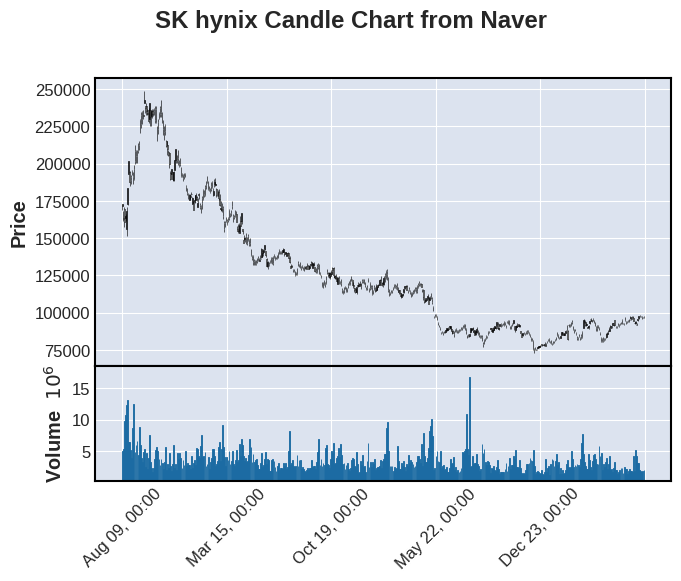

In [49]:
mpf.plot(df, type='candle', volume=True, title='SK hynix Candle Chart from Naver') # 차트 아래에 거래량(Volume)을 함께 표시

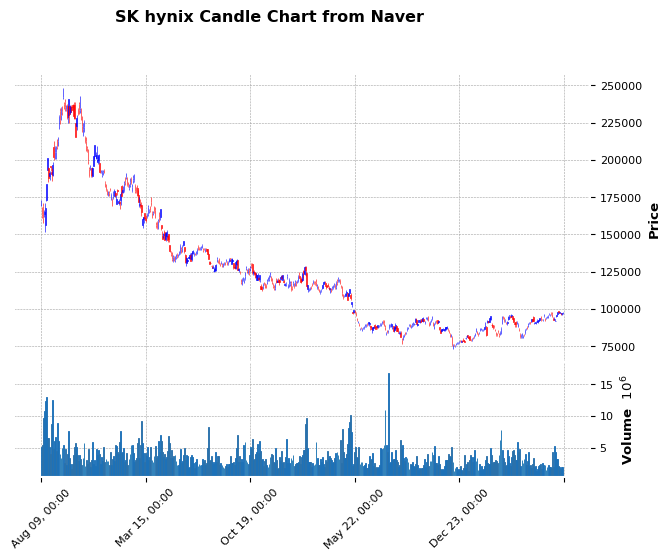

In [50]:
# mplfinance 라이브러리를 사용하여 캔들차트를 그릴 때, 양봉과 음봉의 색상을 지정

import mplfinance as mpf

# 데이터프레임을 mplfinance에서 사용할 수 있는 형태로 변환 (인덱스가 Date이어야 함)
df.index.name = 'Date'

# 캔들차트 스타일 설정
style = mpf.make_mpf_style(
    base_mpf_style='charles',
    marketcolors=mpf.make_marketcolors(up='red', down='blue', inherit=True),
    rc={'font.size': 8}
)

# 캔들차트 그리기
# mpf.plot() 함수의 인자를 통해 색상 설정을 조정
mpf.plot(df,
         type='candle',
         volume=True,
         title='SK hynix Candle Chart from Naver',
         style=style)

## 7. 데이터 저장 및 추가 분석 (선택사항)

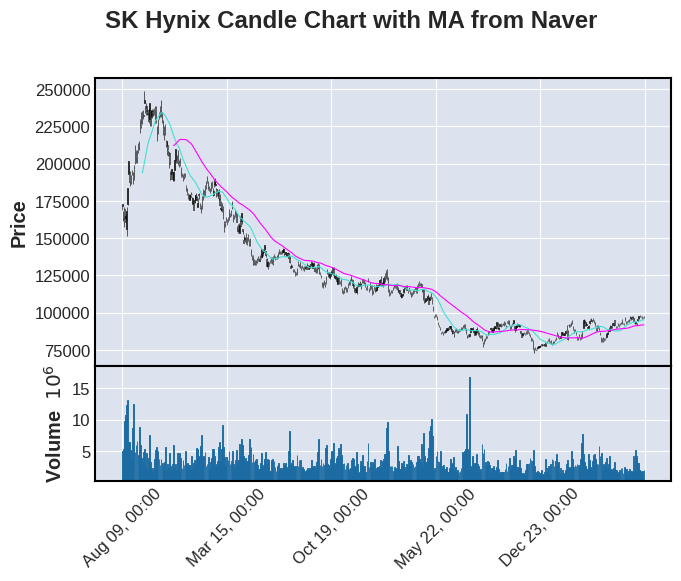

In [51]:
# 데이터 저장
# df.to_csv('sk_hynix_daily_data_naver.csv')

# 이동평균선 추가
mpf.plot(df, type='candle', volume=True, mav=(20, 50), title='SK Hynix Candle Chart with MA from Naver')

## 머신러닝 분석
- Q) sk하이닉스 전체 일별 데이터를 하이퍼파라미터 튜닝을 통해서 언제 고점을 찍을지 예측하는 파이썬 프로그램을 만들어주세요. 각 코드별 상세한 설명이 필요 합니다. <br>
라고 챗GPT에 요청했음


Fitting 5 folds for each of 108 candidates, totalling 540 fits
예측된 고가: 241239.73214285713
예상되는 고점 날짜: DatetimeIndex(['2024-06-20'], dtype='datetime64[ns]', name='Date', freq=None)


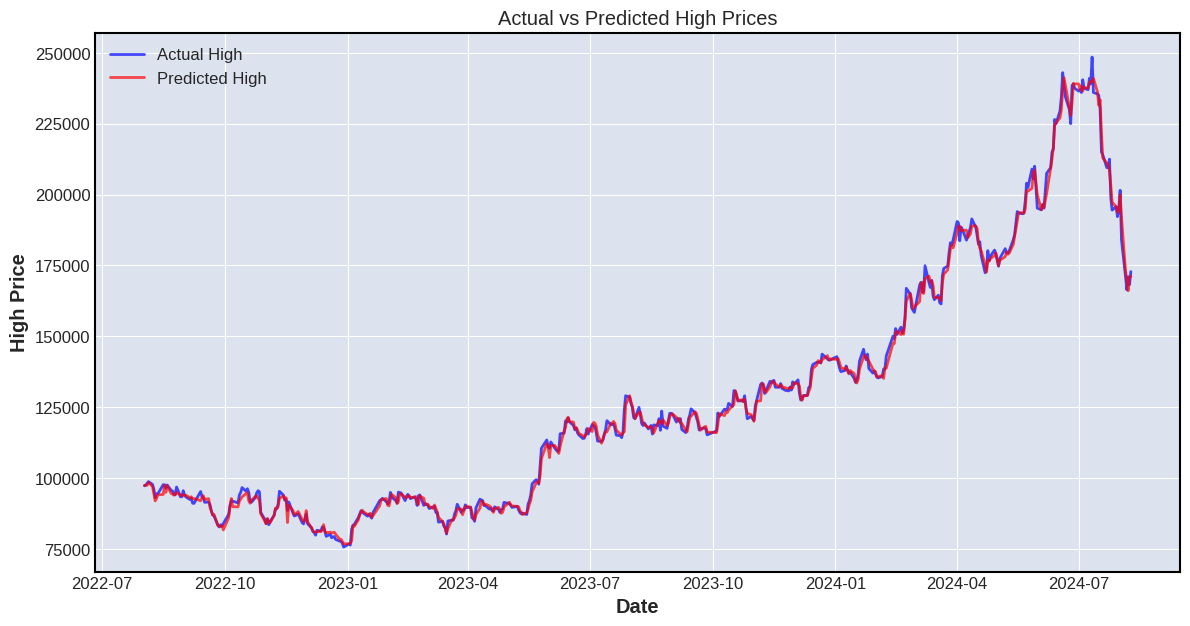

In [52]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. 데이터 로드 및 전처리 (데이터프레임 df가 이미 로드되어 있다고 가정)
df.index.name = 'Date'
df['Target'] = df['High'].shift(-1)  # 다음 날의 고가를 타겟 변수로 설정
df.dropna(inplace=True)  # 결측값 제거

# 특성과 타겟 변수 설정
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 2. 하이퍼파라미터 튜닝을 위한 GridSearchCV 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 모델 추출
best_model = grid_search.best_estimator_

# 3. 모델을 사용하여 미래 고가 예측
df['Predicted_High'] = best_model.predict(X)

# 4. 예측된 고가에서 가장 높은 값을 찾아 고점을 예측
max_predicted_high = df['Predicted_High'].max()
date_of_max_high = df[df['Predicted_High'] == max_predicted_high].index

print(f"예측된 고가: {max_predicted_high}")
print(f"예상되는 고점 날짜: {date_of_max_high}")

# 5. 예측 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['High'], label='Actual High', color='blue', alpha=0.7)
plt.plot(df.index, df['Predicted_High'], label='Predicted High', color='red', alpha=0.7)
plt.title('Actual vs Predicted High Prices')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()
plt.grid(True)
plt.show()

### 날짜가 미래가 아니라 과거로 결과가 나옴
- 24년 8월 10일 이후 예측해 달라고 수정함

### 계속 오류가 나오길래 물어봄ㅋㅋㅋ
챗GPT 대답이 <br>
A) 미래 날짜 예측 문제 <br>
RandomForestRegressor와 같은 머신러닝 모델은  <br>과거 데이터를 기반으로 학습하기 때문에,  <br>미래 날짜의 데이터를 예측하려면  <br>미래의 입력 데이터가 필요합니다.  <br>그러나 현재 데이터프레임 df는  <br>과거 데이터만 포함되어 있으므로, 미래 날짜를 예측할 수 없습니다.

### 방법

## **해결 방안**
- 미래 데이터를 준비하기:<br>
모델을 학습한 후에, 예측할 수 있는 실제 데이터를 확보해야 합니다.<br> 실제 미래 데이터는 보통 시장 예측 모델이 필요하며, 현재 데이터를 기준으로 모델을 생성할 수 없습니다.<br>
- 데이터의 시계열 예측 사용:<br>
시계열 예측 방법을 사용하여 미래의 데이터를 예측할 수 있습니다. <br>예를 들어, ARIMA, SARIMA, Prophet 등이 있습니다. <br>이 방법들은 과거의 시계열 데이터를 분석하여 미래 값을 예측합니다.<br>

**시계열 예측 코드 예시**
아래는 Prophet 라이브러리를 사용하여 시계열 예측을 수행하는 예제입니다. Prophet은 Facebook에서 개발한 시계열 예측 모델로, 향후 특정 날짜의 값을 예측할 수 있습니다.

In [53]:
!pip install prophet

In [54]:
df

,Open,High,Low,Close,Volume,Target,Predicted_High
Date,,,,,,,
2024-08-09,172800.0,172800.0,168800.0,171500.0,5048564.0,168200.0,171164.757143
2024-08-08,162600.0,168200.0,161200.0,163400.0,5370361.0,171000.0,170711.232143
2024-08-07,160900.0,171000.0,157400.0,169300.0,9732037.0,166400.0,166053.886905
2024-08-06,165100.0,166400.0,161500.0,163700.0,10717321.0,171200.0,169463.764286
2024-08-05,168000.0,171200.0,151600.0,156100.0,12358821.0,184000.0,173180.551190
...,...,...,...,...,...,...,...
2022-08-08,97700.0,97700.0,95800.0,96300.0,3206548.0,98700.0,96945.885714
2022-08-05,98100.0,98700.0,97400.0,98500.0,2052852.0,98100.0,98430.921429
2022-08-04,98000.0,98100.0,97100.0,97500.0,1960526.0,97500.0,97417.390476


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj1wn7z1t/6tzqcz_l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj1wn7z1t/lenx6ton.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77743', 'data', 'file=/tmp/tmpj1wn7z1t/6tzqcz_l.json', 'init=/tmp/tmpj1wn7z1t/lenx6ton.json', 'output', 'file=/tmp/tmpj1wn7z1t/prophet_modelb6w5y8ss/prophet_model-20240810123933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in 

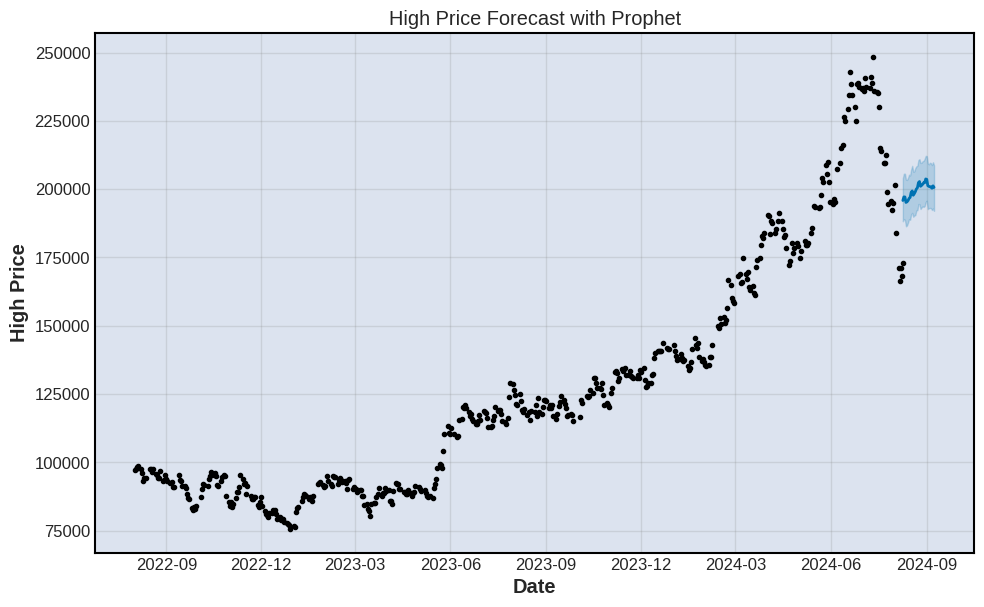

예측된 고가: 203713.63046500518
2024년 8월 9일 이후 예상되는 고점 날짜: ['2024-08-31T00:00:00.000000000']


In [55]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 데이터 로드 (df가 이미 로드되어 있다고 가정)
df.index.name = 'Date'
df = df.reset_index()  # 인덱스를 컬럼으로 변환

# Prophet 라이브러리는 'ds'와 'y' 컬럼을 요구합니다.
df_prophet = df.rename(columns={'Date': 'ds', 'High': 'y'})

# Prophet 모델 설정 및 학습
model = Prophet()
model.fit(df_prophet)

# 미래 날짜 데이터 생성: 2024년 8월 9일 이후 30일 동안 예측
future_start_date = pd.to_datetime('2024-08-09')
future = model.make_future_dataframe(periods=30, freq='D')

# 미래 날짜 데이터 필터링: 2024년 8월 9일 이후의 데이터만 사용
future = future[future['ds'] >= future_start_date]

# 미래 데이터 예측
forecast = model.predict(future)

# 예측 결과 시각화
fig = model.plot(forecast)
plt.title('High Price Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.show()

# 예측 결과에서 고점 날짜 및 고가 찾기
max_predicted_high = forecast['yhat'].max()
date_of_max_high = forecast[forecast['yhat'] == max_predicted_high]['ds']

print(f"예측된 고가: {max_predicted_high}")
print(f"2024년 8월 9일 이후 예상되는 고점 날짜: {date_of_max_high.values}")

### 오 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
20만원이 고점인거가................... ㅋㅋㅋㅋㅋㅋㅋ 8월 31일 함 확인해봐야겟네

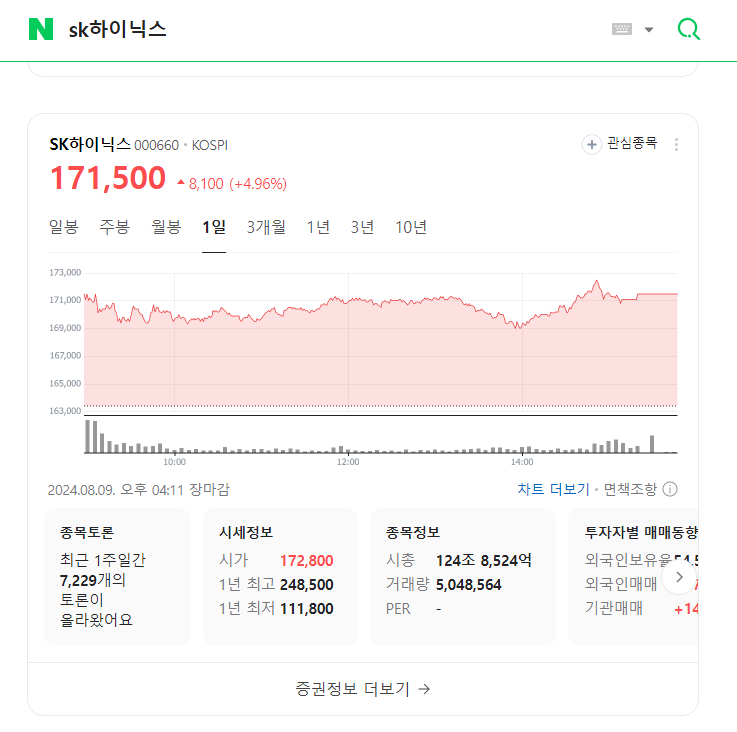